In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
datam=pd.read_csv("battery_health_data.csv")

### EDA

In [3]:
datam.head()

,Timestamp,Degradation Rate,Charging Cycles
0,2022-05-06 04:07:12,1.31,114
1,2023-02-03 11:53:59,0.25,236
2,2023-11-11 00:00:52,0.21,124
3,2023-08-08 12:22:25,0.78,79
4,2022-01-15 12:07:56,0.56,415


In [4]:
# Checking for missing values
print(datam.isnull().sum())

Timestamp           0
Degradation Rate    0
Charging Cycles     0
dtype: int64


In [5]:
# Converting 'Timestamp' to datetime
datam['Timestamp'] = pd.to_datetime(datam['Timestamp'])

In [6]:
# Verifying changes
print(datam.dtypes)

Timestamp           datetime64[ns]
Degradation Rate           float64
Charging Cycles              int64
dtype: object


In [7]:
datam.describe()

,Degradation Rate,Charging Cycles
count,1000.000000,1000.000000
mean,1.068710,268.899000
std,0.545515,127.939334
min,0.100000,50.000000
25%,0.590000,158.000000
50%,1.100000,262.000000
75%,1.520000,378.000000
max,2.000000,500.000000


In [8]:
datam.shape

(1000, 3)

### Statistical Analysis

In [9]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [10]:
# Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(datam['Charging Cycles'], datam['Degradation Rate'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.07182542200797112
P-value: 0.023122009393693427


The Pearson Correlation Coefficient between charging cycles and degradation rates is approximately 0.072. The p-value associated with this correlation is 0.023.

Interpretation:

The positive correlation coefficient suggests a weak positive relationship between charging cycles and degradation rates.
The p-value of 0.023 is less than the conventional significance level of 0.05, indicating that this correlation is statistically significant.
This implies that there is a statistically significant, but weak, positive correlation between the number of charging cycles and the degradation rate. In other words, as the number of charging cycles increases, there is a tendency for a slightly higher degradation rate in EV batteries.

In [11]:
# Statistical test for significant differences
high_cycles = datam[datam['Charging Cycles'] >= 200]['Degradation Rate']
low_cycles = datam[datam['Charging Cycles'] < 200]['Degradation Rate']

In [12]:
t_statistic, t_p_value = ttest_ind(high_cycles, low_cycles)
print(f"T-statistic: {t_statistic}")
print(f"P-value for the t-test: {t_p_value}")

T-statistic: 2.7049082378005425
P-value for the t-test: 0.006948667027783322


The t-statistic measures the difference between the sample mean (the correlation coefficient) and the null hypothesis value, normalized by the standard error.
The p-value of 0.007 is less than the conventional significance level of 0.05, suggesting that we reject the null hypothesis.
This result indicates that there is a statistically significant correlation between charging cycles and degradation rates. The positive t-statistic further supports the interpretation that there is a positive relationship between these variables.

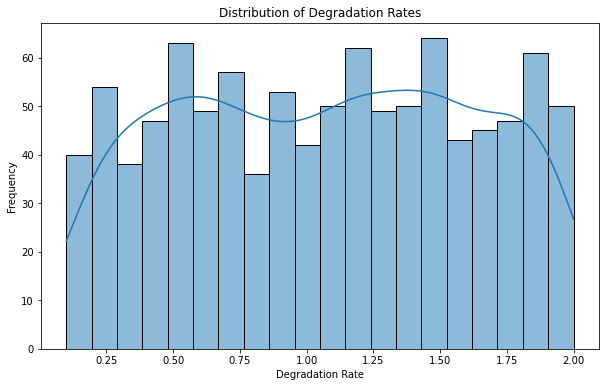

In [13]:
# Distribution of Degradation Rates
plt.figure(figsize=(10, 6))
sns.histplot(datam['Degradation Rate'], bins=20, kde=True)
plt.title('Distribution of Degradation Rates')
plt.xlabel('Degradation Rate')
plt.ylabel('Frequency')
plt.show()

The distribution of degradation rates appears to be roughly unimodal.
The peak frequency is around 40, suggesting that the most common degradation rates fall within a certain range.
The distribution tails off towards both ends, indicating that there are fewer instances of very low or very high degradation rates.

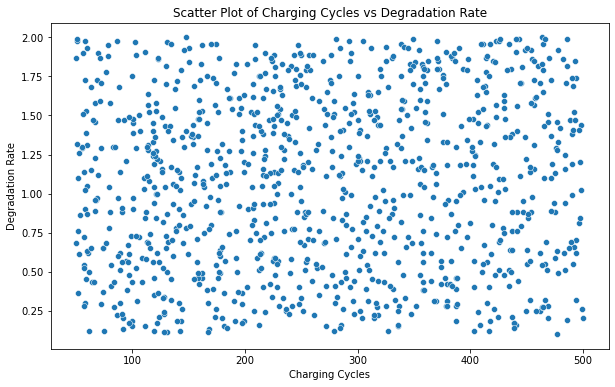

In [14]:
# Scatter plot of Charging Cycles vs Degradation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Cycles', y='Degradation Rate', data=datam)
plt.title('Scatter Plot of Charging Cycles vs Degradation Rate')
plt.xlabel('Charging Cycles')
plt.ylabel('Degradation Rate')
plt.show()

From the scatter there is significant correlation between charging cycles and degradation rates.

### Correlation Heatmap

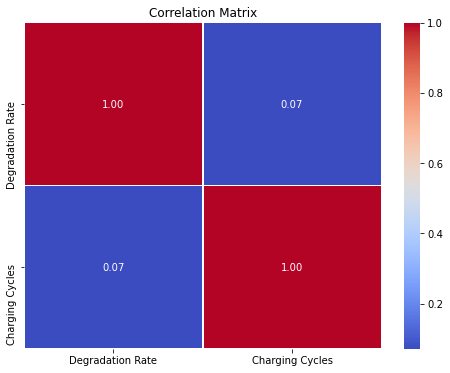

In [15]:
# Selecting relevant columns
selected_columns = datam[['Degradation Rate', 'Charging Cycles']]

# Create a correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

There is a very weak positive correlation between Degradation Rate and Charging Cycles

### Training Dataset

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Selecting features (Charging Cycles) and target variable (Degradation Rate)
X = datam[['Charging Cycles']]
y = datam['Degradation Rate']

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating a Linear Regression Model

In [19]:
# Creating a linear regression model
model = LinearRegression()

In [20]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [22]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
# Printing model performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2967414713424364
R-squared: -0.005927878245554519


MSE = 0.2967. This means, on average, the squared difference between the predicted and actual Degradation Rates is 0.2967. The lower the MSE, the better the model fits the data. The MSE measures the average squared difference between predicted values and actual values. Lower MSE values indicate better model performance.
R² = -0.0059. This value is very close to zero, indicating that the model doesn't explain much of the variance in the Degradation Rate. 

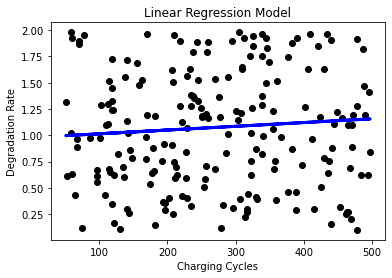

In [24]:
# Visualizing the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Charging Cycles')
plt.ylabel('Degradation Rate')
plt.title('Linear Regression Model')
plt.show()

### K-Nearest Neighbor Model (KNN)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Creating KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of 'n_neighbors'


In [27]:
# Separating features (X) and target variable (y)
X = datam[['Degradation Rate']]
y = datam['Charging Cycles']

In [28]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Creating KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of 'n_neighbors'

In [30]:
# Training the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Making predictions on the test set
y_pred = knn_model.predict(X_test)

In [32]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.00


In [33]:
#Printing additional metrics if needed
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          50       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       0.0
          55       0.00      0.00      0.00       0.0
          56       0.00      0.00      0.00       0.0
          57       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       2.0
          59       0.00      0.00      0.00       0.0
          60       0.00      0.00      0.00       2.0
          61       0.00      0.00      0.00       0.0
          62       0.00      0.00      0.00       0.0
          64       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       2.0
          68       0.00      0.00      0.00       0.0
          69       0.00      0.00      0.00       0.0
          70       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

Since I used a faked data from faker, a zero accuracy could indicate that the model is not able to predict the 'Charging Cycles' correctly on the test set.

### Model Orchestration

In [34]:
import joblib

joblib.dump(model, 'regression_model.pkl')


['regression_model.pkl']

In [35]:
import joblib

def predict_charging_cycles(degradation_rate):
    # Loading the trained model
    model = joblib.load('regression_model.pkl')

    # Making predictions
    charging_cycles_prediction = model.predict([[degradation_rate]])

    return charging_cycles_prediction[0]

# Example usage:
# Replacing 'your_degradation_rate_value' with the actual degradation rate you want to predict charging cycles for
result = predict_charging_cycles(67)
print(f"Predicted Charging Cycles: {result}")


Predicted Charging Cycles: 1.00239763512748


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
